In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time

p_zero = 0.97

cells = np.random.choice([0, 1], size=(100,100), p=[p_zero, 1-p_zero])
    
def get_outer_neighbors(r,c,rows,cols):
    return [[(r-1)%rows, (c-1)%cols],
           [(r-1)%rows, c],
           [(r-1)%rows, (c+1)%cols],
           [r, (c-1)%cols],
           [r, (c+1)%cols],
           [(r+1)%rows, (c-1)%cols],
           [(r+1)%rows, c],
           [(r+1)%rows, (c+1)%cols]]

progression = []

for t in range(50):
    # Copy the old cells
    old_cells = cells.copy()
    progression.append(old_cells)
    
    # Get the shape
    rows, cols = cells.shape
    
    # Loop over the rows/columns and update the state
    for r in range(rows):
        for c in range(cols):
            if (old_cells[r, c] == 0):
                total = 0
                for x in get_outer_neighbors(r, c, rows, cols):
                    if (old_cells[x[0], x[1]] == 1):
                        total += 1
                if (total >= 2):
                    cells[r, c] = 1
            elif (old_cells[r, c] == 1):
                cells[r, c] = 2
            elif (old_cells[r, c] == 2):
                if (np.random.random() < 0.1):
                    cells[r, c] = 3
                else:
                    cells[r, c] = 0


<IPython.core.display.Javascript object>


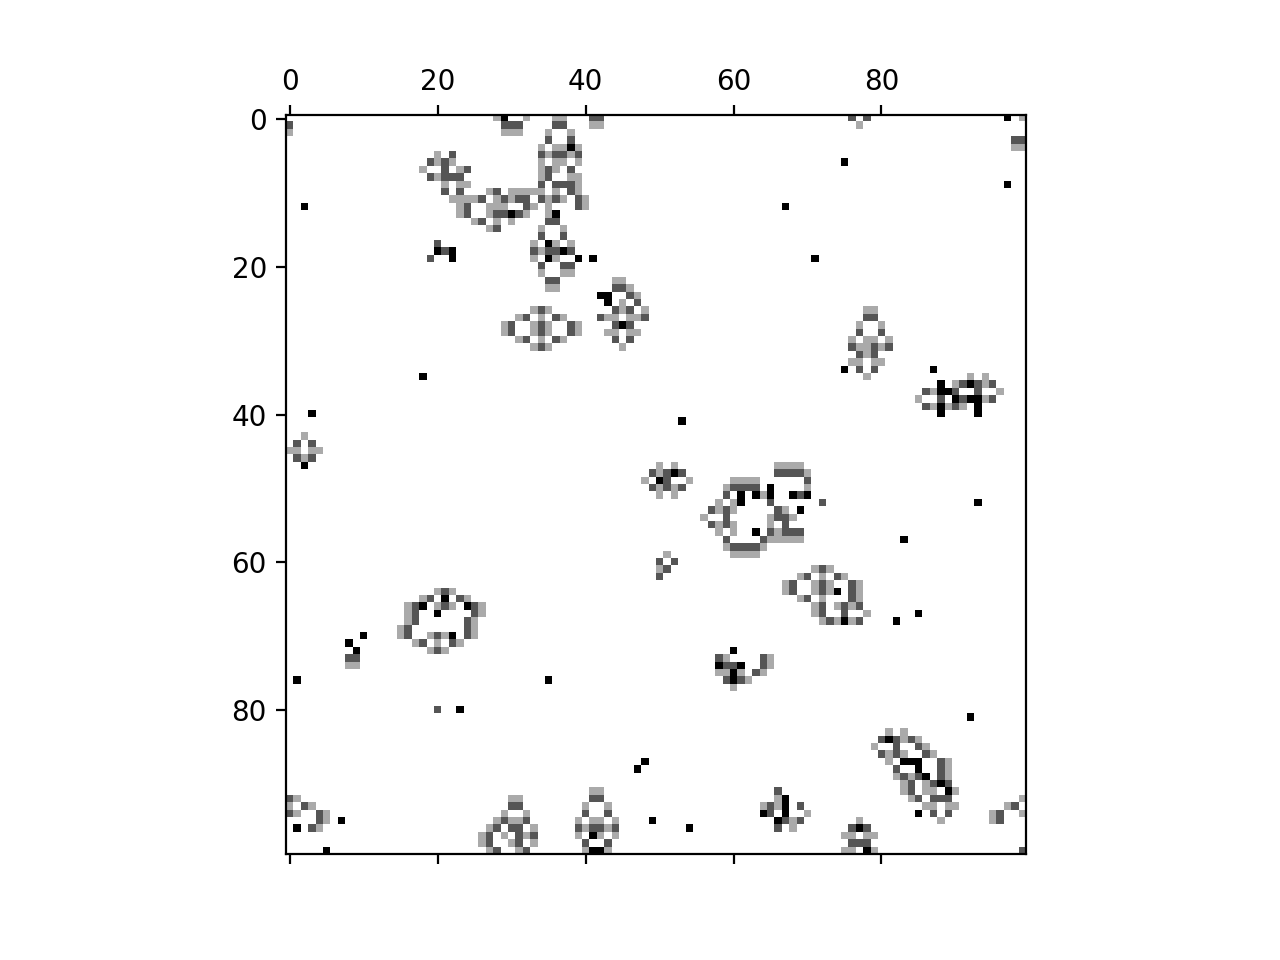

In [6]:
def update(i):
    time.sleep(0.1)
    mat.set_data(progression[i])

fig, ax = plt.subplots()
mat = ax.matshow(cells, cmap='binary', vmin=0, vmax=3)
ani = animation.FuncAnimation(fig, update, frames=50, repeat=False)
plt.show()